## Menggunakan Dataset Fashion-MNIST

Dataset Fashion-MNIST terdiri dari 70.000 gambar yang sudah diklasifikasikan dalam 10 kelas.

Gambarnya berukuran 28x28 pixel, grayscale.

In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                 download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
print(f'trainloader len: {len(trainloader.dataset)}')

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',
                                download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
print(f'testloader len: {len(testloader.dataset)}')


100%|██████████| 26.4M/26.4M [00:01<00:00, 19.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 337kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.30MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.67MB/s]

trainloader len: 60000
testloader len: 10000


label: 3 which is Dress


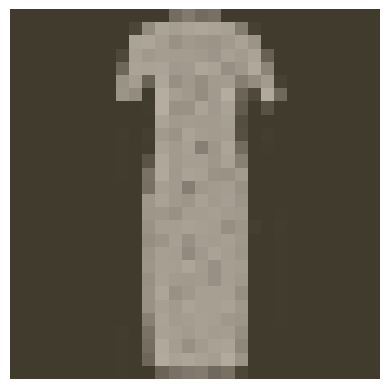

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

image, label = next(iter(trainloader))
imshow(image[0,:])
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f'label: {label[0]} which is {label_names[label[0]]}')

In [5]:
from torch import nn, optim, device, cuda
model = nn.Sequential(nn.Linear(784, 1024),
                      nn.ReLU(),
                      nn.Linear(1024, 512),
                      nn.ReLU(),
                      nn.Linear(512, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.003)
optimizer = optim.Adam(model.parameters(), lr=0.003)

device = device("cuda:0" if cuda.is_available() else "cpu")
model.to(device)  # model will use CPU or GPU

epochs = 27
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Move input and label tensors to the GPU
        images, labels = images.to(device), labels.to(device)

        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5493721209132849
Training loss: 0.40561860629808166
Training loss: 0.3699752174254292
Training loss: 0.34494361618180264
Training loss: 0.31901410739940367
Training loss: 0.3078243089780243
Training loss: 0.3023906738471502
Training loss: 0.28926032142185454
Training loss: 0.2773781147783499
Training loss: 0.27674530004895825
Training loss: 0.2628886126029466
Training loss: 0.25088495342557365
Training loss: 0.2533058049296265
Training loss: 0.24700124870771284
Training loss: 0.24737991559813652
Training loss: 0.24438348235383725
Training loss: 0.23175031709264338
Training loss: 0.2305011541239107
Training loss: 0.23309045478399756
Training loss: 0.21729043654319066
Training loss: 0.21907260123965963
Training loss: 0.23410146569868903
Training loss: 0.20509837109095125
Training loss: 0.19897828662573402
Training loss: 0.20413855848901435
Training loss: 0.19370206714724936
Training loss: 0.20845347982463933


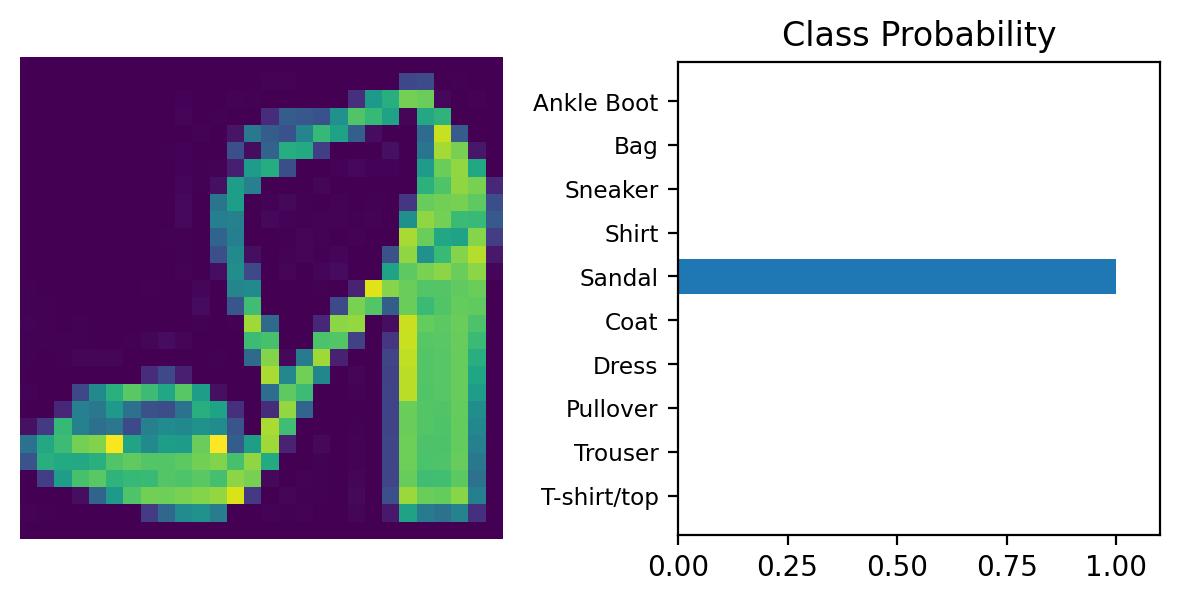

In [6]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                             'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
                             'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)  # GPU
img = images[1].view(images[1].shape[0], -1)  # flatten

# Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.cpu(), ps.cpu(), version='Fashion')  # CPU